## Proyecto análisis de datos 

En este proyecto se quiere intentar entender la problematica actual de la llamada "gentrificación" de la ciudad de Medellín.

En los últimos años se ha percibido una preocupación general en la ciudad de medellín por los precios cada vez más elevados de vida, muchas personas culpan a los extrangeros que llegan a quedarse en la ciudad y gastan en dolares.

El pensamiento general es que al ellos tener mejor capacidad adquisitiva están encareciendo todo por el cambio de su moneda local (mayormente en dolares)

con este estudio se quieren estudiar las llegadas y salidas internacionales del aeropuerto Jose María Cordoba para ver qué tantos individuos han aumentado la población e intentar predecir cuantas personas van a entrar y salir del país, esto con el objetico de prdecir si la población extrangera tiende a la alza o la baja en el futuro.

en el siguiente paso se cargan los datos de legadas y salidas internacionales desde el años 2007 hasta el año 2022

In [1]:
import pandas as pd

diccionario_arrivals = pd.read_excel("arrivals.xlsx", index_col=0)
display(diccionario_arrivals)

,Volumetria,Descripcion,Tipo de dato
Nombre de la columna,,,
lle_periodo,5951,Fecha del viaje,Entero
lle_origenpax,5951,Pais de origen,String
lle_cod,5951,Codigo pais,String
lle_indicador,5951,Indicador de llegada,String
lle_valor,5951,Cantidad de viajeros,String


In [2]:
diccionario_departures = pd.read_excel("departures.xlsx", index_col=0)
display(diccionario_departures)

,Volumetria,Descripcion,Tipo de dato
Nombre de la columna,,,
sal_periodo,6562,Fecha del viaje,Entero
sal_codigo,6562,Codigo pais,String
sal_indicador,6562,Indicador de salida,String
sal_valor,6562,Cantidad de viajeros,String
sal_destinoint,6562,Pais de destino,String


In [3]:
import numpy as np
import matplotlib.pylab as plt
import warnings
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')


arrivals = pd.read_csv("./llegada_mensual_pasajeros_aeropuerto_de_origen_internacional.csv", sep = ';')
departures = pd.read_csv("./salida_mensual_pasajeros_aeropuerto_destino_internacional.csv", sep = ';')

arrivals.columns


Index(['lle_periodo', 'lle_origenpax', 'lle_cod', 'lle_indicador',
       'lle_valor'],
      dtype='object')

ahora se usa la fecha de las llegadas y salidas como indice para crear una serie de tiempo

In [4]:
arrivals['lle_periodo'] = pd.to_datetime(arrivals['lle_periodo'], format='%Y%m')

arrivals.set_index('lle_periodo', inplace=True)
arrivals.sort_index(inplace=True)


arrivals.head()


,lle_origenpax,lle_cod,lle_indicador,lle_valor
lle_periodo,,,,
2007-01-01,Colombia,CO,LLEGADA_PAX_INTERNA,164.0
2007-01-01,Canadá,CA,LLEGADA_PAX_INTERNA,7.0
2007-01-01,Venezuela,VE,LLEGADA_PAX_INTERNA,2797.0
2007-01-01,Uruguay,UY,LLEGADA_PAX_INTERNA,18.0
2007-01-01,Turquía,TR,LLEGADA_PAX_INTERNA,0.0


In [5]:
departures['sal_periodo'] = pd.to_datetime(departures['sal_periodo'], format='%Y%m')

departures.set_index('sal_periodo', inplace=True)
departures.sort_index(inplace=True)

departures.head()


,sal_codigo,sal_indicador,sal_valor,sal_destinoint
sal_periodo,,,,
2007-01-01,AN,SALIDA_PAX,906.0,Antillas Neerlandesas
2007-01-01,VE,SALIDA_PAX,4215.0,Venezuela
2007-01-01,UY,SALIDA_PAX,14.0,Uruguay
2007-01-01,US,SALIDA_PAX,16643.0,Estados Unidos
2007-01-01,TT,SALIDA_PAX,36.0,Trinidad y Tobago


en el siguiente paso se hará un análisis de completitud de los datos

In [6]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5951 entries, 2007-01-01 to 2022-02-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lle_origenpax  5951 non-null   object
 1   lle_cod        5951 non-null   object
 2   lle_indicador  5951 non-null   object
 3   lle_valor      5951 non-null   object
dtypes: object(4)
memory usage: 232.5+ KB


In [7]:
arrivals['lle_origenpax'].unique()

array(['Colombia', 'Canadá', 'Venezuela', 'Uruguay', 'Turquía',
       'Trinidad y Tobago', 'República Dominicana', 'Perú', 'Bolivia',
       'Paraguay', 'Panamá', 'Nicaragua', 'México', 'Costa Rica', 'Haití',
       'Cuba', 'Brasil', 'Ecuador', 'El Salvador', 'España', 'Honduras',
       'Filipinas', 'Guatemala', 'Antillas Neerlandesas', 'Bahamas',
       'Argentina', 'Estados Unidos', 'Chile', 'Jamaica', 'Belice',
       'Guyana', 'Reino Unido', 'Islas Caimán', 'Italia', 'Japón',
       'Portugal', 'China', 'Francia', 'Alemania', 'Australia',
       'Bermudas', 'Barbados', 'Corea del Sur', 'Emiratos Árabes Unidos',
       'Israel', 'Países Bajos', 'Rusia', 'Senegal', 'Suecia', 'Suiza',
       'Bélgica', 'Grecia', 'Qatar', 'Marruecos', 'Guam', 'Irlanda',
       'Otros países del Caribe', 'San Cristóbal y Nieves', 'Sudáfrica',
       'Jordania', 'Puerto Rico', 'Austria', 'Dinamarca', 'Noruega',
       'Nueva Zelanda', 'Hungría', 'Luxemburgo',
       'ISLAS VÍRGENES BRITÁNICAS', 'Costa 

In [8]:
arrivals['lle_valor'] = pd.to_numeric(arrivals['lle_valor'], errors='coerce')
print(arrivals.isnull().sum())


lle_origenpax      0
lle_cod            0
lle_indicador      0
lle_valor        110
dtype: int64


se evidencia que hay datos vacíos en la columna `lle_valor`, se analiza más profundamente para deducir cuál puede ser la causa y con base en eso tratarlos apropiadamente.

se aíslan las filas con valores nulos (NaN) y se valida si podrían ser ceros

In [9]:
null_rows = arrivals[arrivals['lle_valor'].isnull()]
null_rows

,lle_origenpax,lle_cod,lle_indicador,lle_valor
lle_periodo,,,,
2019-04-01,Nueva Zelanda,NZ,LLEGADA_PAX_INTERNA,NaN
2019-04-01,Noruega,NO,LLEGADA_PAX_INTERNA,NaN
2019-04-01,Jordania,JO,LLEGADA_PAX_INTERNA,NaN
2019-04-01,Suecia,SE,LLEGADA_PAX_INTERNA,NaN
2019-04-01,San Cristóbal y Nieves,KN,LLEGADA_PAX_INTERNA,NaN
...,...,...,...,...
2019-12-01,antigua and barbuda,AG,LLEGADA_PAX_INTERNA,NaN
2019-12-01,Barbados,BB,LLEGADA_PAX_INTERNA,NaN
2019-12-01,Belice,BZ,LLEGADA_PAX_INTERNA,NaN


en esta lista de países con `lle_valor` se pueden notar duplicados, ahora se validará si son todos paíese que no es comín que lleguen pasajeros a colombia

In [10]:
print(null_rows['lle_origenpax'].unique())

['Nueva Zelanda' 'Noruega' 'Jordania' 'Suecia' 'San Cristóbal y Nieves'
 'saint lucia' 'Senegal' 'Croacia' 'Dinamarca' 'india' 'Irlanda'
 'Sudáfrica' 'antigua and barbuda' 'Nicaragua' 'Belice'
 'Trinidad y Tobago' 'Jamaica' 'Marruecos' 'Qatar' 'Islas Caimán'
 'Barbados' 'Haití' 'Venezuela']


de lo anterior se puede deducir que no son países muy comunes por lo tanto es muy probable que los valores sean cero. por eso se procederá a reemplazar los datos nulos por ceros

In [11]:
arrivals['lle_valor'].fillna(0, inplace=True)
print(arrivals.isnull().sum())

lle_origenpax    0
lle_cod          0
lle_indicador    0
lle_valor        0
dtype: int64


ahora se hará lo mismo con las salidas

In [12]:
departures['sal_valor'] = pd.to_numeric(departures['sal_valor'], errors='coerce')
print(departures.isnull().sum())

sal_codigo          0
sal_indicador       0
sal_valor         112
sal_destinoint      0
dtype: int64


In [13]:
null_rows = departures[departures['sal_valor'].isnull()]
null_rows

,sal_codigo,sal_indicador,sal_valor,sal_destinoint
sal_periodo,,,,
2019-04-01,LU,SALIDA_PAX,NaN,Luxemburgo
2019-04-01,KN,SALIDA_PAX,NaN,San Cristóbal y Nieves
2019-04-01,LC,SALIDA_PAX,NaN,saint lucia
2019-04-01,ZA,SALIDA_PAX,NaN,Sudáfrica
2019-04-01,TT,SALIDA_PAX,NaN,Trinidad y Tobago
...,...,...,...,...
2019-12-01,DK,SALIDA_PAX,NaN,Dinamarca
2019-12-01,HR,SALIDA_PAX,NaN,CROACIA
2019-12-01,BZ,SALIDA_PAX,NaN,Belice


al igual que en los casos anterioes se puede decir que eso valores nulos son cero, se procede a reemplazarlos

In [14]:
departures['sal_valor'].fillna(0, inplace=True)
print(departures.isnull().sum())

sal_codigo        0
sal_indicador     0
sal_valor         0
sal_destinoint    0
dtype: int64


teniendo los datos completos se procede a hacer un análisis exploratorio de los datos

## Análisis exploratorio de los datos

Se porocede a hacer un análiss exhaustivo de los datos para ver algunos datos útiles de ellos

In [15]:
arrivals['lle_indicador'].unique()

array(['LLEGADA_PAX_INTERNA'], dtype=object)

se puede observar que el campo `lle_indicador` no es útil para el análisis, se procede a removerlo del dataframe

In [16]:
arrivals = arrivals.drop(['lle_indicador', 'lle_cod'], axis=1)
arrivals.head()

,lle_origenpax,lle_valor
lle_periodo,,
2007-01-01,Colombia,164.0
2007-01-01,Canadá,7.0
2007-01-01,Venezuela,2797.0
2007-01-01,Uruguay,18.0
2007-01-01,Turquía,0.0


<AxesSubplot:xlabel='lle_origenpax'>

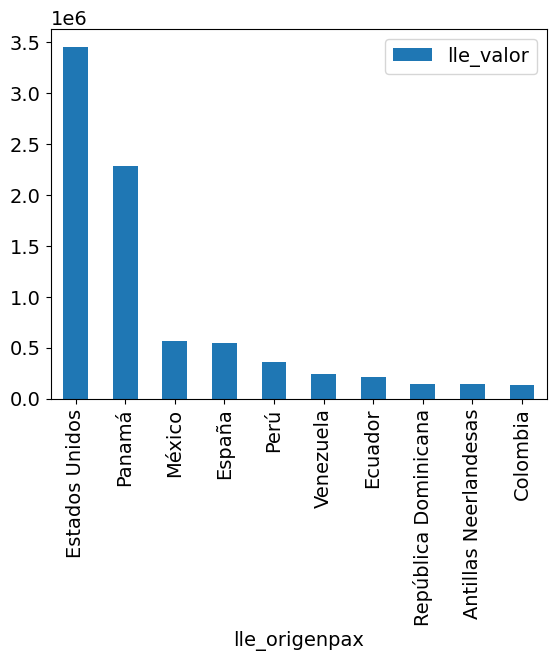

In [17]:
total_by_country_arr = pd.DataFrame(arrivals.groupby('lle_origenpax')['lle_valor'].sum())
total_by_country_arr.sort_values(by=['lle_valor'], inplace=True, ascending=False)
total_by_country_arr.head(10).plot(kind='bar')

Se puede observar que por mucho que del país que más llegan personas a colombia es Estados Unidos, ahora se hará lo mismo para la salidas y se hará una comparación de los resultados 

In [18]:
departures = departures.drop(['sal_codigo','sal_indicador'], axis=1)

<AxesSubplot:xlabel='sal_destinoint'>

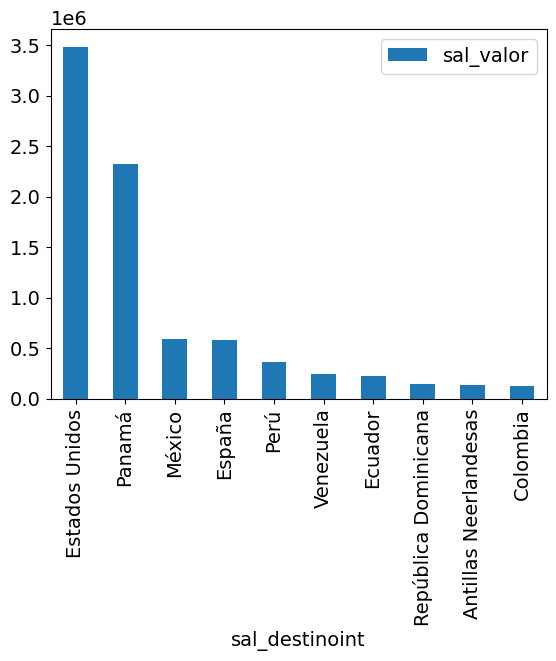

In [19]:
total_by_country_deps = pd.DataFrame(departures.groupby('sal_destinoint')['sal_valor'].sum())
total_by_country_deps.sort_values(by=['sal_valor'], inplace=True, ascending=False)
total_by_country_deps.head(10).plot(kind='bar')

de esta comparación se pueden obtener algunos datos interesantes:
- los países con más llegadas son los mismos y en una cantidad muy similar a los de salidas
- al parecer no hay diferencias significativas que indiquen que la población de la ciudad esté creciendo por viajeros

Ahora se procede a encontrar las reales diferencias entre llegadas y salidas

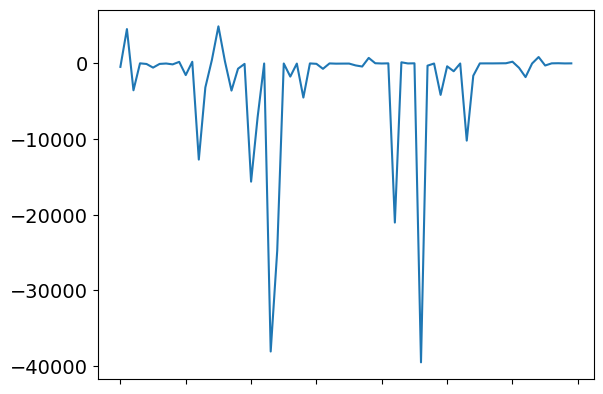

In [20]:
difference = total_by_country_arr['lle_valor'].sub(total_by_country_deps['sal_valor'], axis = 0)
difference.dropna().plot()
plt.tick_params(labelbottom=False)
plt.show()

De lo anterios se puede notar que las diferencias están muy cerca del cero casi siempre

## Modelado

en la siguiente sección se intentará modelar la serie de tiempo y predecir como será la llegada y salida de pasajeros en el futuro

### Llegadas
se inentarán modelar los datos de llegadas:

In [21]:
# Ordenar los datos por fecha
arrivals = arrivals.sort_index()
arrivals['lle_valor'] = pd.to_numeric(arrivals['lle_valor'], errors='coerce')

# Agrupar los datos por país de origen y calcular la suma de llegadas
arrivals_dates = arrivals.groupby('lle_periodo')['lle_valor'].sum()
arrivals_dates

lle_periodo
2007-01-01     26447.0
2007-02-01     15191.0
2007-03-01     18883.0
2007-04-01     19036.0
2007-05-01     20853.0
                ...   
2021-10-01     84267.0
2021-11-01     88836.0
2021-12-01    111019.0
2022-01-01     91991.0
2022-02-01     73609.0
Name: lle_valor, Length: 182, dtype: float64

In [22]:
departures = departures.sort_index()
departures['sal_valor'] = pd.to_numeric(departures['sal_valor'], errors='coerce')

# Agrupar los datos por país de origen y calcular la suma de llegadas
departures_dates = departures.groupby('sal_periodo')['sal_valor'].sum()
departures_dates

sal_periodo
2007-01-01     33981.0
2007-02-01     18209.0
2007-03-01     21678.0
2007-04-01     21842.0
2007-05-01     21012.0
                ...   
2021-10-01     83935.0
2021-11-01     87859.0
2021-12-01     99794.0
2022-01-01    102787.0
2022-02-01     76352.0
Name: sal_valor, Length: 182, dtype: float64

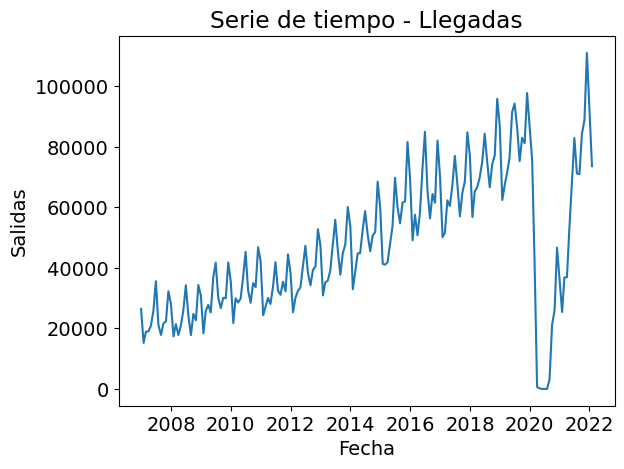

In [23]:
# Datos de llegadas
plt.plot(arrivals_dates.index, arrivals_dates)
plt.xlabel('Fecha')
plt.ylabel('Salidas')
plt.title('Serie de tiempo - Llegadas')
plt.show()

Es evidente que en el año `2020` hay una caída bastante pronunciada, esto se debe a la crisi mundial con el Covid-19
a continuación se procede a verificar si la serie es estacional con la pueba de `Dickey-Fuller`

In [24]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(arrivals_dates, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -2.075935
p-value                   0.254301
Lags Used                14.000000
No. of Obs              167.000000
Critical Value (1%)      -3.470126
Critical Value (5%)      -2.879008
Critical Value (10%)     -2.576083
dtype: float64


el p-valor = 0.254301 no es sufciente para descartar la hipótesis nula, po lo tanto no podemos afirmar aún que es una serie estacional, se tomará entonces la serie en diferencias:

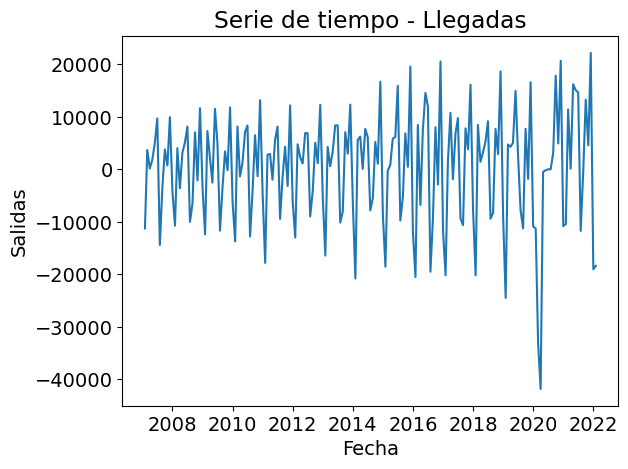

In [25]:
### Llevar la serie a diferencias
diff_arrivals = arrivals_dates.diff().dropna()

plt.plot(diff_arrivals.index, diff_arrivals)
plt.xlabel('Fecha')
plt.ylabel('Salidas')
plt.title('Serie de tiempo - Llegadas')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(diff_arrivals, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -4.675226
p-value                   0.000094
Lags Used                14.000000
No. of Obs              166.000000
Critical Value (1%)      -3.470370
Critical Value (5%)      -2.879114
Critical Value (10%)     -2.576139
dtype: float64


Podemos deducir que es estacional, sin embargo podemos observar en la serie de tiempo que hay outliers en un periodo del 2020 a 2021 aproximadamente que es lo esperado 

In [27]:
X = arrivals_dates.copy()
size = int(len(X) * 0.8)
train_arrivals, test_arrivals = X[0:size], X[size:len(X)]
train_arrivals

lle_periodo
2007-01-01    26447.0
2007-02-01    15191.0
2007-03-01    18883.0
2007-04-01    19036.0
2007-05-01    20853.0
               ...   
2018-09-01    66588.0
2018-10-01    74293.0
2018-11-01    77188.0
2018-12-01    95846.0
2019-01-01    86927.0
Name: lle_valor, Length: 145, dtype: float64

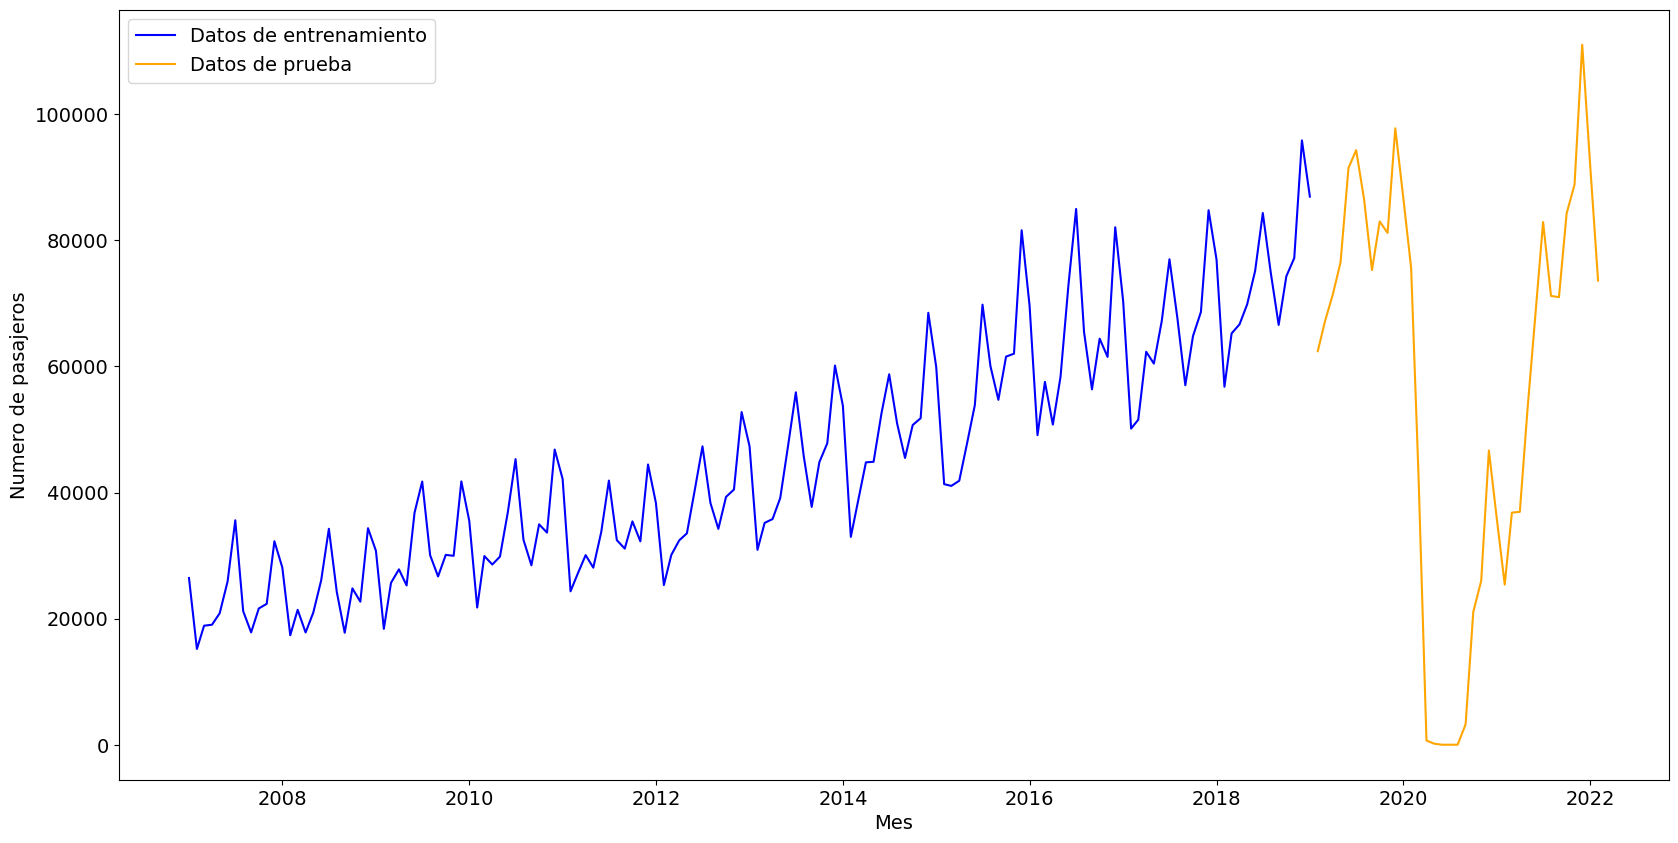

In [28]:
plt.figure(figsize=(20,10))
plt.xlabel("Mes")
plt.ylabel("Numero de pasajeros")
plt.plot(train_arrivals, color='blue', label='Datos de entrenamiento')
plt.plot(test_arrivals, color='orange', label='Datos de prueba')
plt.legend()

a continuacón se usarán difernetes modelos y se comparará el error para definir cuál es mejor

In [29]:
#AR Arrivals

from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

model=ARIMA(train_arrivals, order=(1,1,0)) # p, d, q
results=model.fit()

prediccion_ar1 = results.fittedvalues[1:]

In [30]:
#MA
model=ARIMA(train_arrivals, order=(0,1,1)) # p, d, q
results=model.fit()

prediccion_ma1 = results.fittedvalues[1:]

In [31]:
#ARIMA
model=ARIMA(train_arrivals, order=(3,1,3)) # p, d, q
results=model.fit()

prediccion_arima =  results.fittedvalues[1:]

In [32]:
# Este es un ARIMA (3,1,3), pero además en la parte estacional pongo P,D,Q,S igual a 2,1,2,12. 
model=ARIMA(train_arrivals, order=(3,1,3), seasonal_order=(2, 1, 2, 12) ) #
results=model.fit()
prediccion_sarima = results.fittedvalues[1:]

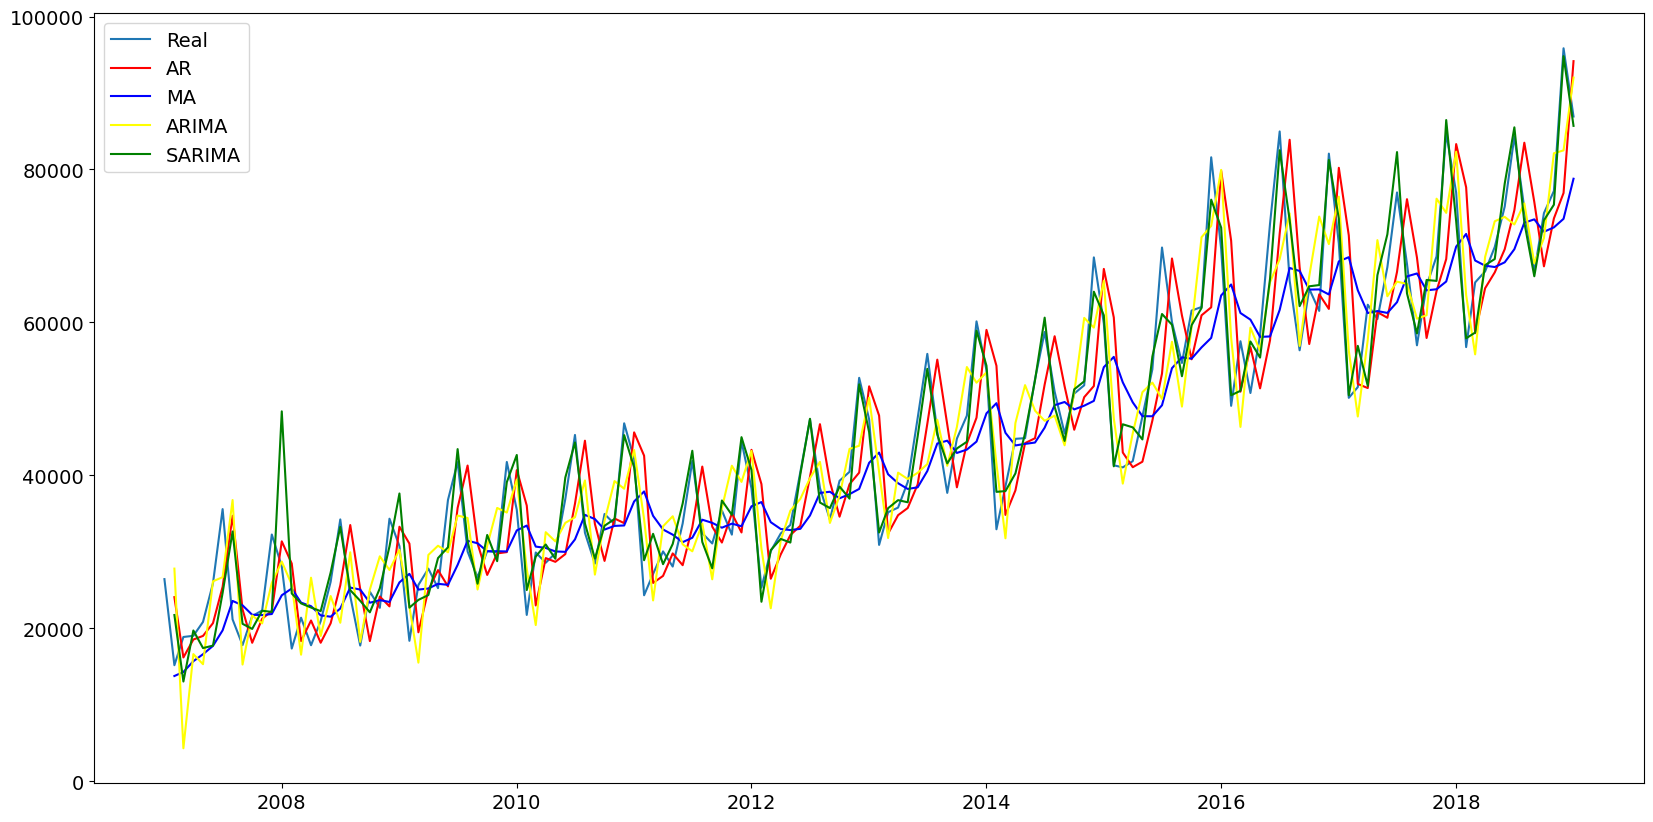

In [33]:
plt.figure(figsize=(20,10))
plt.plot(train_arrivals, label='Real')
plt.plot(prediccion_ar1, color='red',  label='AR')
plt.plot(prediccion_ma1, color='blue', label='MA')
plt.plot(prediccion_arima, color='yellow', label='ARIMA')
plt.plot(prediccion_sarima, color='green', label='SARIMA')
plt.legend()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_ar = mean_squared_error(train_arrivals[1:], prediccion_ar1)
mae_ar = mean_absolute_error(train_arrivals[1:], prediccion_ar1)


print('MSE_AR: '+str(mse_ar))
print('MAE_AR: '+str(mae_ar))
print('------------------------')

mse_ma = mean_squared_error(train_arrivals[1:], prediccion_ma1)
mae_ma = mean_absolute_error(train_arrivals[1:], prediccion_ma1)


print('MSE_MA: '+str(mse_ma))
print('MAE_MA: '+str(mae_ma))
print('------------------------')



mse_arima = mean_squared_error(train_arrivals[1:], prediccion_arima)
mae_arima = mean_absolute_error(train_arrivals[1:], prediccion_arima)


print('MSE_ARIMA: '+str(mse_arima))
print('MAE_ARIMA: '+str(mae_arima))
print('------------------------')

mse_sarima = mean_squared_error(train_arrivals[1:], prediccion_sarima)
mae_sarima = mean_absolute_error(train_arrivals[1:], prediccion_sarima)


print('MSE: '+str(mse_sarima))
print('MAE: '+str(mae_sarima))



MSE_AR: 82158613.02620989
MAE_AR: 7418.7169764752425
------------------------
MSE_MA: 74068751.9946954
MAE_MA: 6441.829418941548
------------------------
MSE_ARIMA: 46649993.62307514
MAE_ARIMA: 5534.243621479836
------------------------
MSE: 16400300.555024765
MAE: 2896.609142789049


Analizando los errores podemos decir que el modelo que mejorpredice la realidad es el `SARIMA`
Ahora se entrena el modelo 

In [35]:
#### Hiperparámetros elegidos
p_fin = 3
d_fin = 1
q_fin = 3

P_fin = 2
D_fin = 1
Q_fin = 2
S_fin = 12

se chequea si los residuos son ruido blanco 

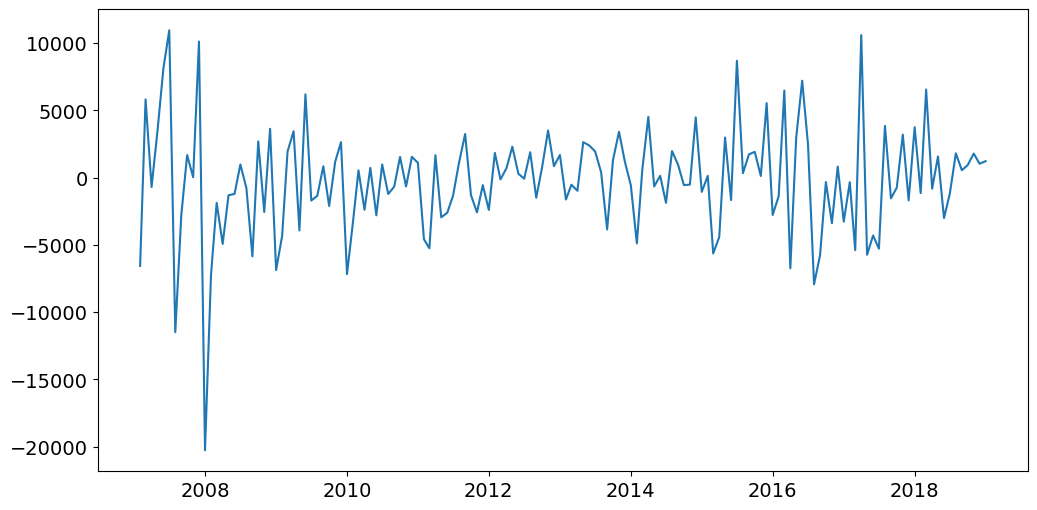

In [36]:
residuos_arrivals = results.resid[1:] ### Residuos del modelo

plt.figure(figsize=(12,6))
plt.plot(residuos_arrivals)

In [37]:
np.mean(residuos_arrivals)

-197.85983698911397

In [38]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(results.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,8.528485,0.129415


Ahora se usa el modelo para predecir cómo será el comportamiento de la serie para 3 años en el futuro

In [39]:
history = list(train_arrivals.values.copy())
predictions = list()

model =  ARIMA(history, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin) )
model_fit = model.fit()
output = model_fit.forecast(len(test_arrivals))   ### Esta es la linea clave: predigo todo a la vez, por eso le paso "len(test)""
yhat = output
predictions = yhat

mae = mean_absolute_error(test_arrivals, predictions)
print('Test MAE: %.3f' % mae)
mse = mean_squared_error(test_arrivals, predictions)
print('Test MSE: %.3f' % mse)

Test MAE: 31801.931
Test MSE: 2004282655.501


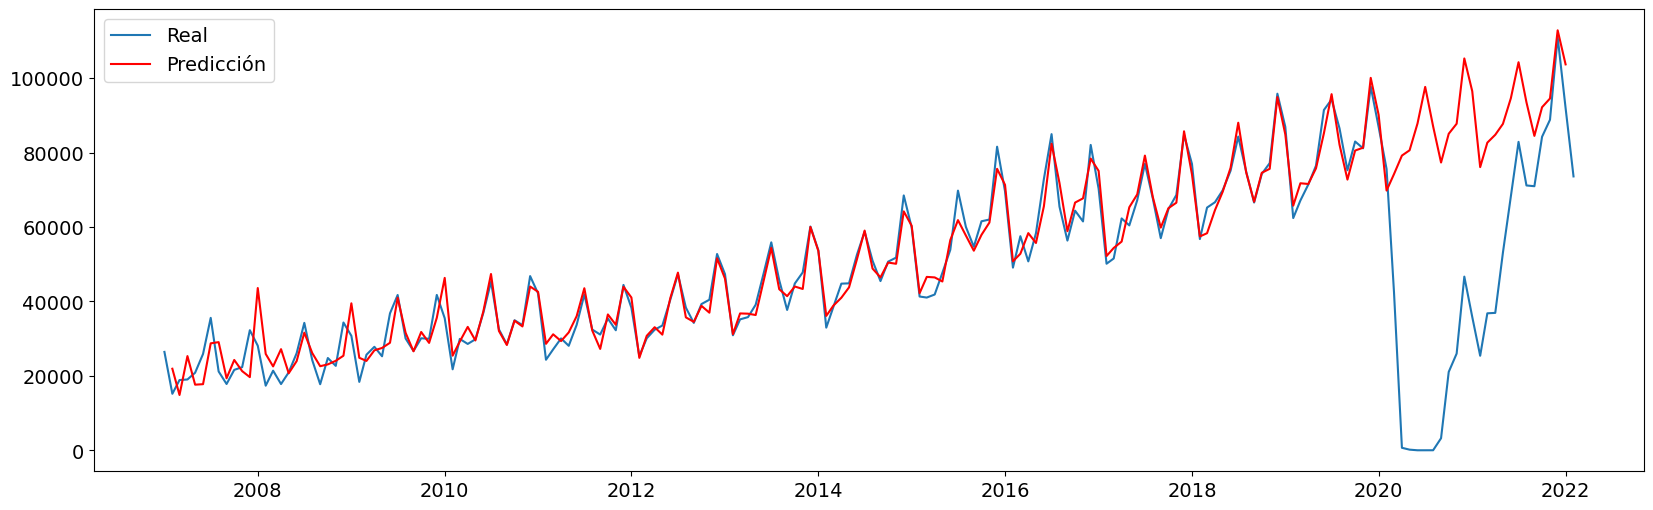

In [40]:
model =  ARIMA(train_arrivals, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin), enforce_stationarity=False )

# Mirar que pongo data para usar todos los datos
results_arrivals=model.fit()
prediccion_sarima = results_arrivals.fittedvalues[1:]

x_arrivals = results_arrivals.get_forecast(steps=36)

### El valor predicho es
x_pred_arrivals = x_arrivals.predicted_mean
x_pred_arrivals = pd.concat([prediccion_sarima,x_pred_arrivals ])

plt.figure(figsize=(20,6))

### graficando
plt.plot(arrivals_dates, label='Real')
plt.plot(x_pred_arrivals, color='red', label='Predicción')
plt.legend()
    

Aunque hay muchos datos atípicos en el año `2020`, se puede notar que el modelo hace muy buen fit para el resto del tiempo

### Salidas

Para este dataframe se seguirán exactamente los mismos pasos que para el dataframe de llegadas

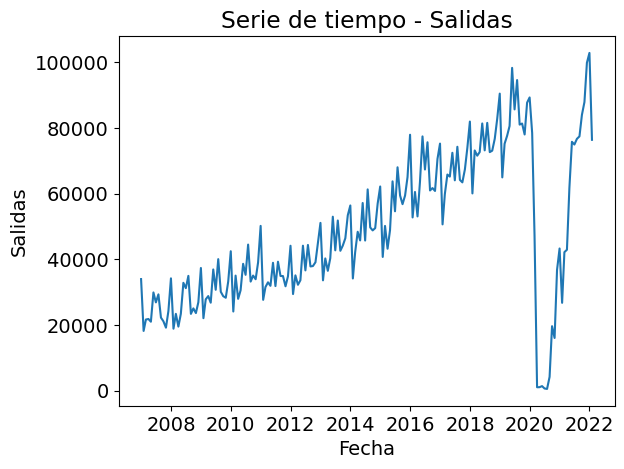

In [41]:
# Datos de Salidas
plt.plot(departures_dates.index, departures_dates)
plt.xlabel('Fecha')
plt.ylabel('Salidas')
plt.title('Serie de tiempo - Salidas')
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(departures_dates, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -1.978546
p-value                   0.296058
Lags Used                14.000000
No. of Obs              167.000000
Critical Value (1%)      -3.470126
Critical Value (5%)      -2.879008
Critical Value (10%)     -2.576083
dtype: float64


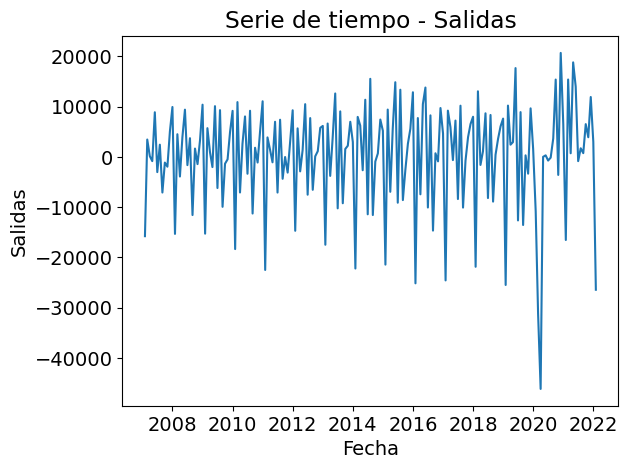

In [43]:
### Llevar la serie a diferencias
diff_departures = departures_dates.diff().dropna()

plt.plot(diff_departures.index, diff_departures)
plt.xlabel('Fecha')
plt.ylabel('Salidas')
plt.title('Serie de tiempo - Salidas')
plt.show()

In [44]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(diff_departures, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -4.782973
p-value                   0.000059
Lags Used                13.000000
No. of Obs              167.000000
Critical Value (1%)      -3.470126
Critical Value (5%)      -2.879008
Critical Value (10%)     -2.576083
dtype: float64


Podemos deducir que es estacional, sin embargo podemos observar en la serie de tiempo que hay outliers en un periodo del 2020 a 2021 como era de esperarse

In [45]:
X = departures_dates.copy()
size = int(len(X) * 0.8)
train_departures, test_departures = X[0:size], X[size:len(X)]

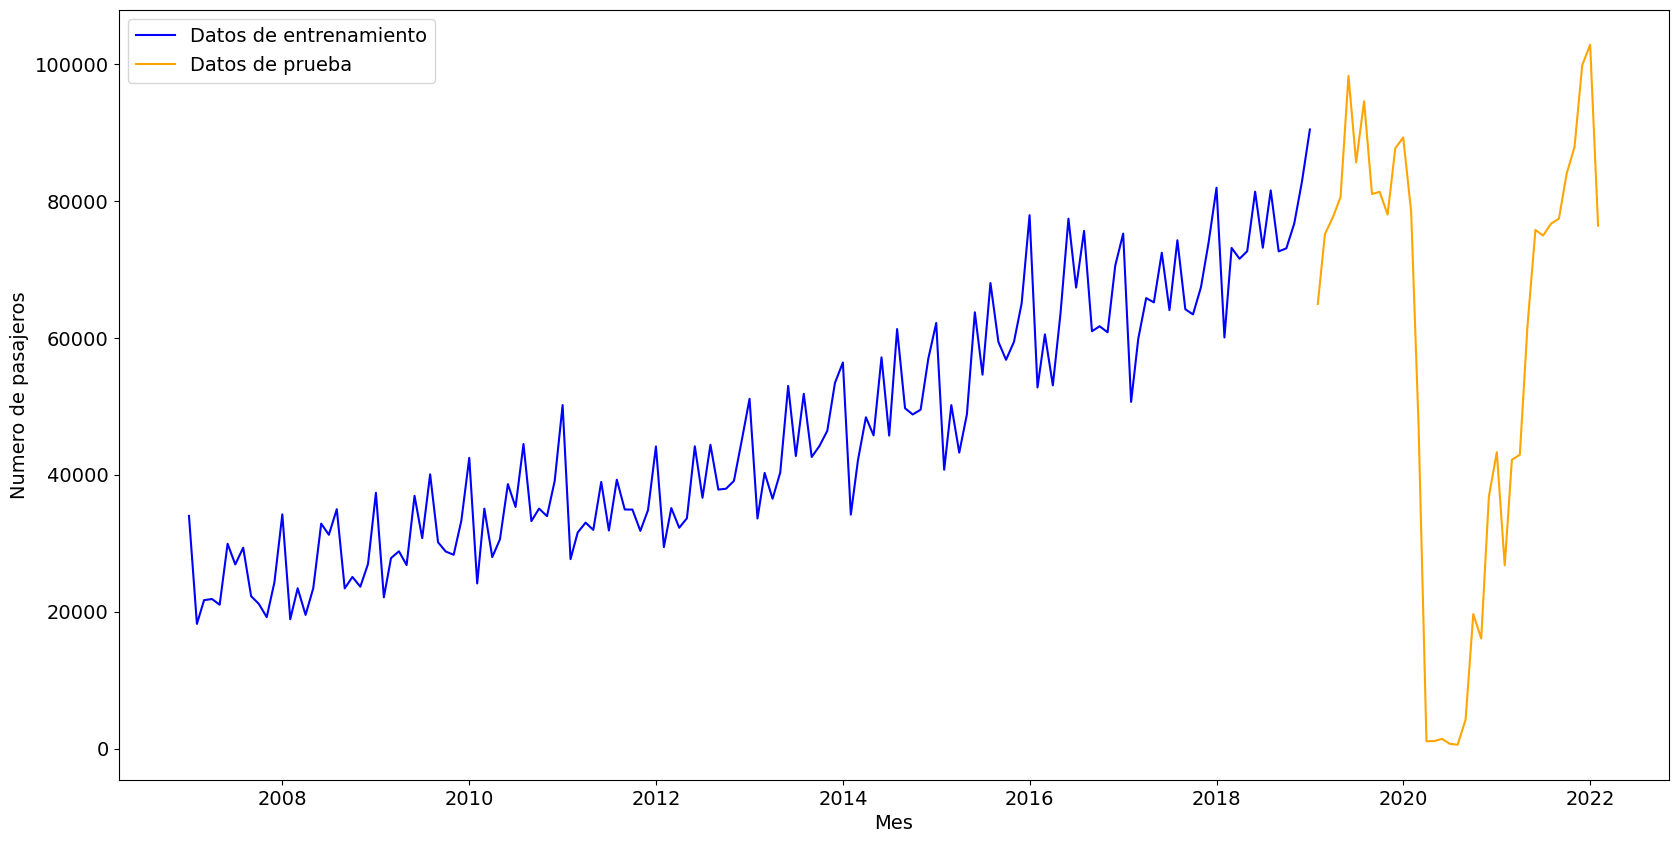

In [46]:
plt.figure(figsize=(20,10))
plt.xlabel("Mes")
plt.ylabel("Numero de pasajeros")
plt.plot(train_departures, color='blue', label='Datos de entrenamiento')
plt.plot(test_departures, color='orange', label='Datos de prueba')
plt.legend()

In [47]:
#AR Arrivals

from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

model=ARIMA(train_departures, order=(1,1,0)) # p, d, q
results=model.fit()

prediccion_ar1 = results.fittedvalues[1:]

In [48]:
#MA
model=ARIMA(train_departures, order=(0,1,1)) # p, d, q
results=model.fit()

prediccion_ma1 = results.fittedvalues[1:]

In [49]:
#ARIMA
model=ARIMA(train_departures, order=(3,1,3)) # p, d, q
results=model.fit()

prediccion_arima =  results.fittedvalues[1:]

In [50]:
#SARIMA
model=ARIMA(train_departures, order=(3,1,3), seasonal_order=(2, 1, 2, 12) ) #
results=model.fit()
prediccion_sarima = results.fittedvalues[1:]

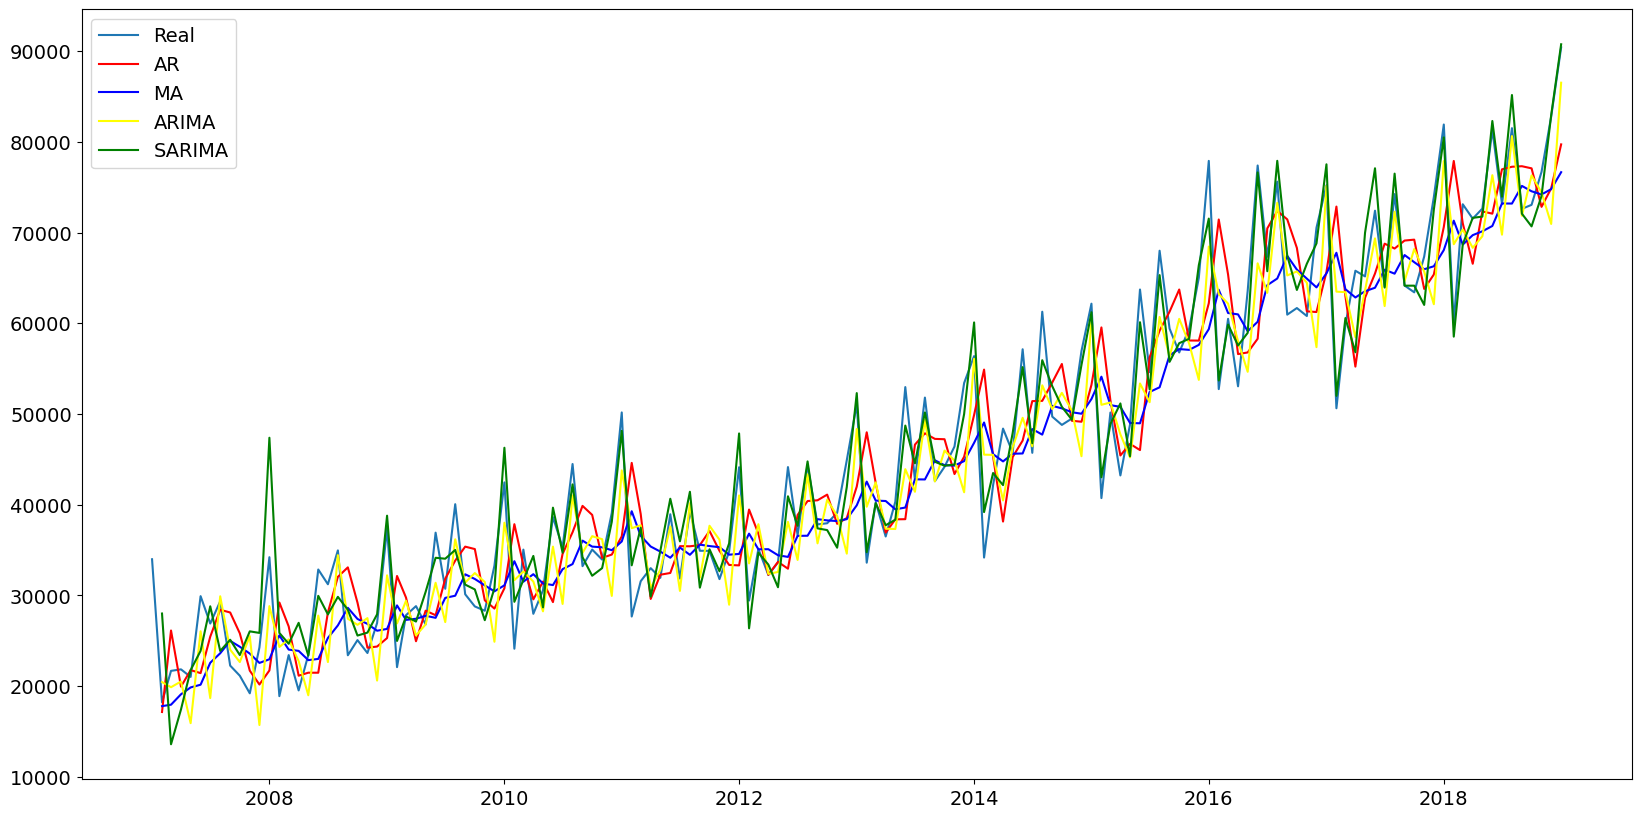

In [51]:
plt.figure(figsize=(20,10))
plt.plot(train_departures, label='Real')
plt.plot(prediccion_ar1, color='red',  label='AR')
plt.plot(prediccion_ma1, color='blue', label='MA')
plt.plot(prediccion_arima, color='yellow', label='ARIMA')
plt.plot(prediccion_sarima, color='green', label='SARIMA')
plt.legend()

In [52]:
mse_ar = mean_squared_error(train_departures[1:], prediccion_ar1)
mae_ar = mean_absolute_error(train_departures[1:], prediccion_ar1)


print('MSE_AR: '+str(mse_ar))
print('MAE_AR: '+str(mae_ar))
print('------------------------')

mse_ma = mean_squared_error(train_departures[1:], prediccion_ma1)
mae_ma = mean_absolute_error(train_departures[1:], prediccion_ma1)


print('MSE_MA: '+str(mse_ma))
print('MAE_MA: '+str(mae_ma))
print('------------------------')



mse_arima = mean_squared_error(train_departures[1:], prediccion_arima)
mae_arima = mean_absolute_error(train_departures[1:], prediccion_arima)


print('MSE_ARIMA: '+str(mse_arima))
print('MAE_ARIMA: '+str(mae_arima))
print('------------------------')

mse_sarima = mean_squared_error(train_departures[1:], prediccion_sarima)
mae_sarima = mean_absolute_error(train_departures[1:], prediccion_sarima)


print('MSE: '+str(mse_sarima))
print('MAE: '+str(mae_sarima))


MSE_AR: 58528722.13223568
MAE_AR: 5908.596140951192
------------------------
MSE_MA: 48481890.57913832
MAE_MA: 5315.156611046256
------------------------
MSE_ARIMA: 28329692.514548466
MAE_ARIMA: 4226.719120582701
------------------------
MSE: 12330130.860681385
MAE: 2711.34895878371


Al igual que en el caso de llegadas, para las salidas el mejor modelo por medidas de error es el `SARIMA`

In [53]:
#### Hiperparámetros elegidos

p_fin = 3
d_fin = 1
q_fin = 3

P_fin = 2
D_fin = 1
Q_fin = 2
S_fin = 12

se chequea si los residuos son ruido blanco 

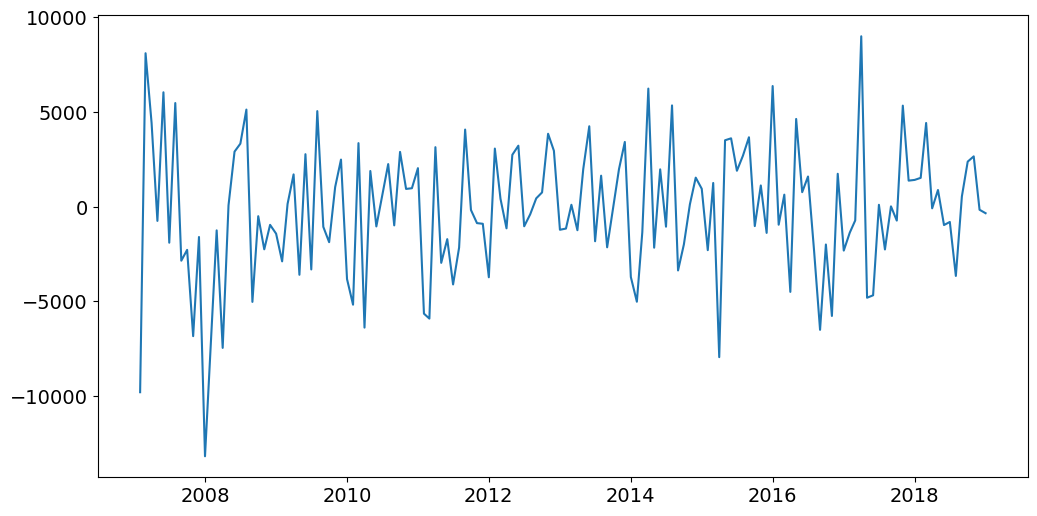

In [54]:
residuos_departures = results.resid[1:] ### Residuos del modelo

plt.figure(figsize=(12,6))
plt.plot(residuos_departures)

In [55]:
np.mean(residuos_departures)

-201.9452500742884

In [56]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(results.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,7.495908,0.186293


In [57]:
## Predicciones Multi-step ahead 
history = list(train_departures.values.copy())
predictions = list()

model =  ARIMA(history, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin) )
model_fit = model.fit()
output = model_fit.forecast(len(test_departures))   ### Esta es la linea clave: predigo todo a la vez, por eso le paso "len(test)""
yhat = output
predictions = yhat

mae = mean_absolute_error(test_departures, predictions)
print('Test MAE: %.3f' % mae)
mse = mean_squared_error(test_departures, predictions)
print('Test MSE: %.3f' % mse)

Test MAE: 32555.129
Test MSE: 2109415600.152


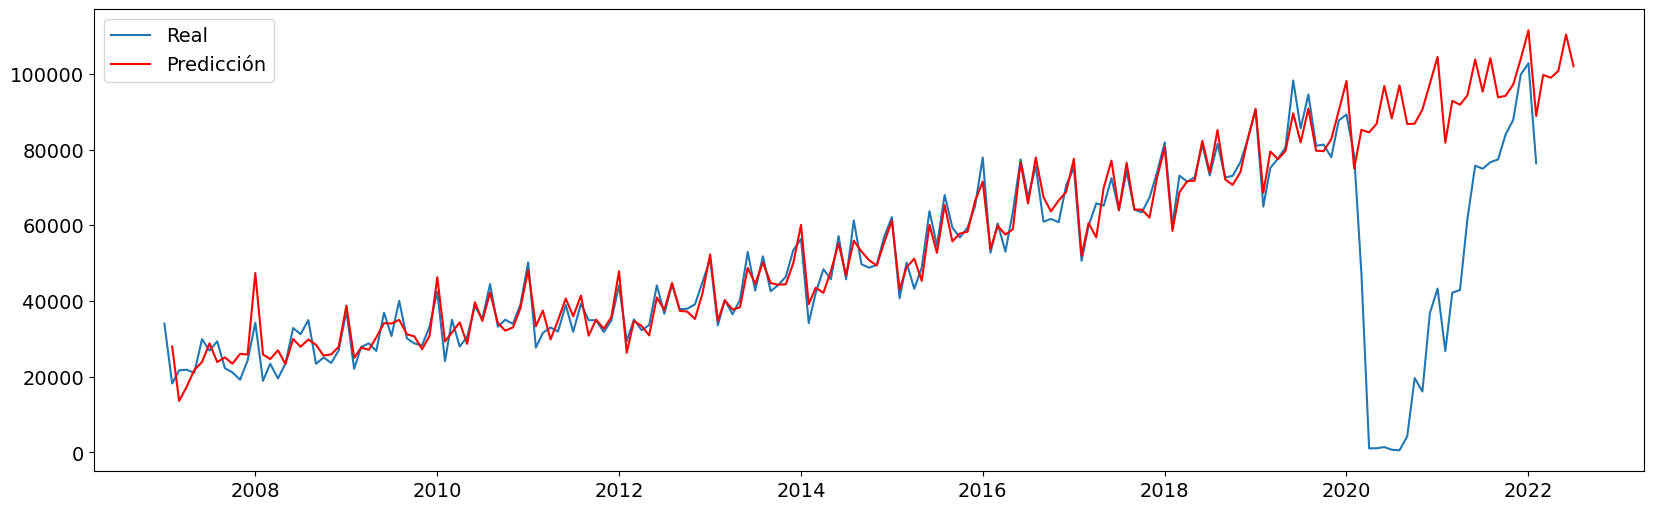

In [58]:
model =  ARIMA(train_departures, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin) ) #
# Mirar que pongo data para usar todos los datos
results_departures = model.fit()
prediccion_sarima = results_departures.fittedvalues[1:]

x_departures = results_departures.get_forecast(steps=42)

### El valor predicho es
x_pred_departures = x_departures.predicted_mean
x_pred_departures = pd.concat([prediccion_sarima,x_pred_departures ])

###  Graficar las predicciones a futuro
plt.figure(figsize=(20,6))

plt.plot(departures_dates, label='Real')
plt.plot(x_pred_departures, color='red', label='Predicción')
plt.legend()